Estimation of ATE for $T \perp\!\!\!\!\perp X$, $p(T=1) = 0.5$, $Y \in \mathbb{R}$ using the unadjusted estimator and an estimator where the outcome is modelled as a function of covariates $X$, treatment $T$ and their interaction. 

Relevant references:
Rosenblum, M., & Van Der Laan, M. J. (2010). Simple, efficient estimators of treatment effects in randomized trials using generalized linear models to leverage baseline variables. The international journal of biostatistics, 6(1), 13.

In [1]:
import numpy as np
from src.synthetic_data import ex3_sample1, ex3_sample2
from src.ate_estimators import ate_unadjusted_cont, ate_tmle_cont, conf_int

'''
Simulation setup
'''
seed = 1 # for reproducibility
r = 1000 # number of simulations
d = 1 # number of covariates
sample_size = [100,250,500,1000] # sample size used for training
np.random.seed(seed)

In [2]:
'''
Run simulation
'''
unadj_ate_v1 = np.zeros([len(sample_size),r])
tmle_ate_v1 = np.zeros([len(sample_size),r])
unadj_ate_v2 = np.zeros([len(sample_size),r])
tmle_ate_v2 = np.zeros([len(sample_size),r])
unadj_ate_sigma_v1 = np.zeros([len(sample_size),r])
tmle_ate_sigma_v1 = np.zeros([len(sample_size),r])
unadj_ate_sigma_v2 = np.zeros([len(sample_size),r])
tmle_ate_sigma_v2 = np.zeros([len(sample_size),r])
for i in range(len(sample_size)):
    print(f"Running simulation using sample size = {sample_size[i]}...")
    for j in range(r):
        # Run for correctly specified model
        data = ex3_sample1(sample_size[i],d)
        unadj_ate_v1[i,j], unadj_ate_sigma_v1[i,j]  = ate_unadjusted_cont(data['t'],data['y'])
        tmle_ate_v1[i,j], tmle_ate_sigma_v1[i,j] = ate_tmle_cont(data['t'],data['x'],data['y'])

        # Repeat for incorrectly specified
        data = ex3_sample2(sample_size[i],d)
        unadj_ate_v2[i,j], unadj_ate_sigma_v2[i,j]  = ate_unadjusted_cont(data['t'],data['y'])
        tmle_ate_v2[i,j], tmle_ate_sigma_v2[i,j] = ate_tmle_cont(data['t'],data['x'],data['y'])

data = ex3_sample1(100,1)
true_ate = data['ate']

Running simulation using sample size = 100...
Running simulation using sample size = 250...
Running simulation using sample size = 500...
Running simulation using sample size = 1000...


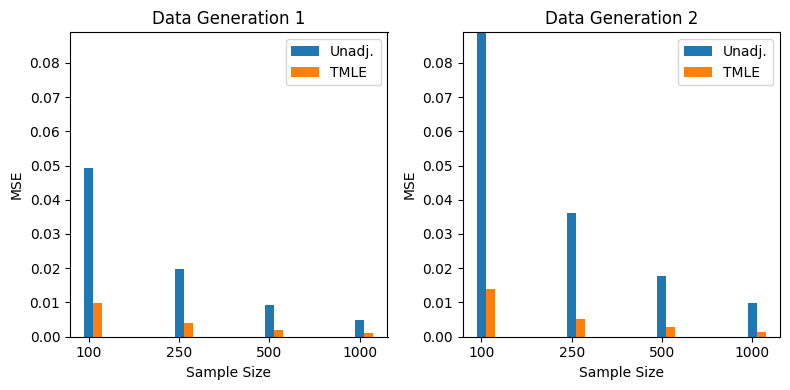

In [7]:
'''
Plot MSE of ATE
'''
import matplotlib.pyplot as plt
mse_unadj_v1 = np.mean(np.square(unadj_ate_v1-true_ate),axis=1)
mse_tmle_v1 = np.mean(np.square(tmle_ate_v1-true_ate),axis=1)
mse_unadj_v2 = np.mean(np.square(unadj_ate_v2-true_ate),axis=1)
mse_tmle_v2 = np.mean(np.square(tmle_ate_v2-true_ate),axis=1)

max_lim = np.max([mse_unadj_v1,mse_unadj_v2,mse_tmle_v1,mse_tmle_v2])

fig,ax = plt.subplots(ncols=2,figsize=(8,4))
ax[0].bar(np.arange(len(sample_size)),mse_unadj_v1,label='Unadj.',width=0.1)
ax[0].bar(np.arange(len(sample_size))+0.1,mse_tmle_v1,label='TMLE',width=0.1)
ax[0].set_xticks(np.arange(len(sample_size)),sample_size)
ax[0].set_xlabel("Sample Size")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].set_title("Data Generation 1")
ax[0].set_ylim([0,max_lim])
ax[1].bar(np.arange(len(sample_size)),mse_unadj_v2,label='Unadj.',width=0.1)
ax[1].bar(np.arange(len(sample_size))+0.1,mse_tmle_v2,label='TMLE',width=0.1)
ax[1].set_xticks(np.arange(len(sample_size)),sample_size)
ax[1].set_xlabel("Sample Size")
ax[1].set_ylabel("MSE")
ax[1].set_title("Data Generation 2")
ax[1].legend()
ax[1].set_ylim([0,max_lim])
fig.tight_layout()

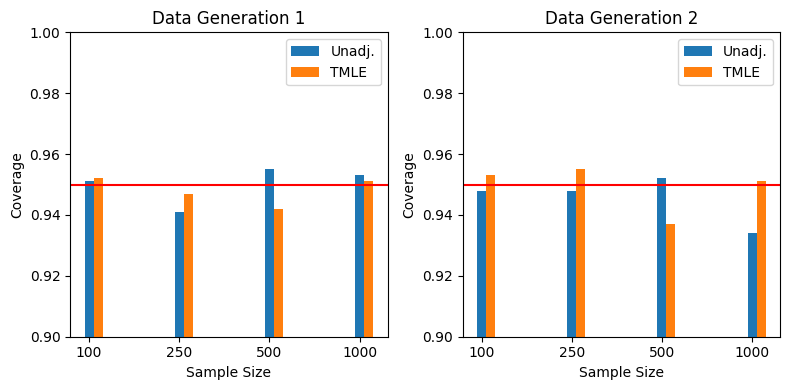

In [6]:
'''
Plot Coverage 
'''
import matplotlib.pyplot as plt
coverage_tmle_v1 = np.zeros([len(sample_size)])
coverage_unadj_v1 = np.zeros([len(sample_size)])
coverage_tmle_v2 = np.zeros([len(sample_size)])
coverage_unadj_v2 = np.zeros([len(sample_size)])
for i,ns in enumerate(sample_size):

    lower,upper = conf_int(unadj_ate_v1[i,:],unadj_ate_sigma_v1[i,:],ns)
    coverage_unadj_v1[i] = np.sum((true_ate>lower)&(true_ate<upper))/r
    lower,upper = conf_int(unadj_ate_v2[i,:],unadj_ate_sigma_v2[i,:],ns)
    coverage_unadj_v2[i] = np.sum((true_ate>lower)&(true_ate<upper))/r
    lower,upper = conf_int(tmle_ate_v1[i,:],tmle_ate_sigma_v1[i,:],ns)
    coverage_tmle_v1[i] = np.sum((true_ate>lower)&(true_ate<upper))/r
    lower,upper = conf_int(tmle_ate_v2[i,:],tmle_ate_sigma_v2[i,:],ns)
    coverage_tmle_v2[i] = np.sum((true_ate>lower)&(true_ate<upper))/r

fig,ax = plt.subplots(ncols=2,figsize=(8,4))
ax[0].bar(np.arange(len(sample_size)),coverage_unadj_v1,label='Unadj.',width=0.1)
ax[0].bar(np.arange(len(sample_size))+0.1,coverage_tmle_v1,label='TMLE',width=0.1)
ax[0].set_xticks(np.arange(len(sample_size)),sample_size)
ax[0].set_xlabel("Sample Size")
ax[0].set_ylabel("Coverage")
ax[0].legend()
ax[0].set_title("Data Generation 1")
ax[0].axhline(0.95,color='r')
ax[0].set_ylim([0.9,1])
ax[1].bar(np.arange(len(sample_size)),coverage_unadj_v2,label='Unadj.',width=0.1)
ax[1].bar(np.arange(len(sample_size))+0.1,coverage_tmle_v2,label='TMLE',width=0.1)
ax[1].set_xticks(np.arange(len(sample_size)),sample_size)
ax[1].set_xlabel("Sample Size")
ax[1].set_ylabel("Coverage")
ax[1].set_title("Data Generation 2")
ax[1].legend()
ax[1].axhline(0.95,color='r')
ax[1].set_ylim([0.9,1])
fig.tight_layout()